# Algorithms for DNA Sequencing Labs
## Week 2
    2.1) boyer moore
    2.2) substring index
    2.3) approximate matching

## 2.1 boyer moore

In [67]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-12-08 13:49:15--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.192, 99.84.232.26, 99.84.232.33, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.3’

lambda_virus.fa.3   100%[===================>]  48.12K  --.-KB/s    in 0.03s   

2020-12-08 13:49:15 (1.43 MB/s) - ‘lambda_virus.fa.3’ saved [49270/49270]



In [68]:
import collections
lambda_reads = readFastq('lambda_virus.fa.1')
count = collections.Counter()
for read in lambda_reads:
    count.update(read)
count

Counter({'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCG': 1,
         'CGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGG': 1,
         'AAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACA': 1,
         'CCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGA': 1,
         'CAAAAAGCACCGGGATAACACGCTCACCATGAAGCGTTTCACTAATGGGCGTGGCTTCTGGTGCCTGGGC': 1,
         'CCGCATTTTATGCGTTTTCATGTTGCCTGCCCGCATTGCGGGGAGGAGCAGTATCTTAAATTTGGCGACA': 1,
         'TTCACATCTGGACAGCGTACAGCCCGTTCACCACCTGGGTGCAGATTGTCAAAGACTGGATGAAAACGAA': 1,
         'TGAGGAAAGCTGGCTGATTGACCGGCAGATTATTATGGGCCGCCACGACGATGAACAGACGCTGCTGCGT': 1,
         'GTTTACCTTACCGAAATCGGTACGGATACCGCGAAAGAGCAGATTTATAACCGCTTCACACTGACGCCGG': 1,
         'GCTGGCAGCTGGATCTCAGTGCGCTGCTGGCGAGCCTGCAGGAAGAGGATGGTGCAGCAACCAACAAGAA': 1,
         'ACACAGCGACGCAGGGGACCTGCAGGATTTTATGTATGAAAACGCCCACCATTCCCACCCTTCTGGGGCC': 1,
         'CGGGTCTTTTTTCCGGCTCAGTCATCGCCCAAGCTGGCGCTATC

In [69]:
lambda_reads, _ = readFastq('lambda_virus.fa.1')

In [70]:
def naive(p, t):
    occurrences = [] # keep track of all indices where p matches t
    for i in range(len(t)-len(p) + 1):# loop through every position where p could start
        # create a boolean variable match which we'll initialize to be true
        # compare every character of P against the corresponding position in t
        # if there's a mismatch, set match to false
        # for j in range up to the length of p
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [71]:
# use the readGenome function to read this
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lambda_virus.fa.1')

In [72]:
t = genome
p = 'AGGT'
list = naive(p, t)

In [73]:
print(len(list))

150


In [74]:
t = genome
p = 'ACCT'
list2 = naive(p, t)
print(len(list2))

156


In [75]:
o = 150 + 156

In [76]:
print(o)

306


In [77]:
t = genome
p = 'TTAA'
list = naive(p, t)
print(len(list))

195


In [78]:
t = genome
p = 'ACTAAGT'
naive(p, t)

[27733, 45382]

In [79]:
t = genome
p = 'ACTAAGT'
naive(reverseComplement(p), t)

[26028]

In [80]:
t = genome
p = 'AGTCGA'
naive(p, t)

[18005, 23320, 33657, 44806]

In [81]:
t = genome
p = 'AGTCGA'
naive(reverseComplement(p), t)

[450, 1908, 2472, 41927, 45369]

In [82]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mismatch_count = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch_count+=1

                if mismatch_count > 2:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [83]:
t = genome
p = 'AGGAGGTT'
naive_2mm(p, t)
#occ_2err = naive_2mm(p, t)
#print(len(occ_2err))

[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

In [84]:
t = genome
p = 'TTCAAGCC'
naive(p, t)

[26046]

In [85]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-12-08 13:49:15--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.192, 99.84.232.26, 99.84.232.33, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.1’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2020-12-08 13:49:17 (1.56 MB/s) - ‘ERR037900_1.first1000.fastq.1’ saved [241626/241626]



In [86]:
def readFASTQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True: # this is where you parse each line of each FASTQ entry
            fh.readline().rstrip() # add rstrip to remove white space
            seq = fh.readline()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFASTQ('ERR037900_1.first1000.fastq')

In [87]:
def phred33toQ(qual):
    """Turn Phred + 33 ASCII-Encoded quality into Q"""
    return ord(qual)-33

In [88]:
print(quals)

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHHHIHIHHHGH:#@@@@9@C@EEGCGGFIFFF9FCAF?EEE4B8>>', "HHHHHHHHHHHHHHHHHHHHHHIFHFEGGFHHHHHHGHHHHGHHHHHFHAFGHEHHIHHGBCCDC,#55564565CE:BB44+'5/36,(<<BC<DDBCE", 'HHFHHDHHHHDDGGGDHDHHHHHGHHHHHHHDHHECHHH8GGDEEHHHHEH?3HG<=4>555624/#5/55/555DADA#####################', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIIFIHEIIGFI@#==?46560GAAEDGGDGCA8CCB=@########', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHEHHHGH@

In [89]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


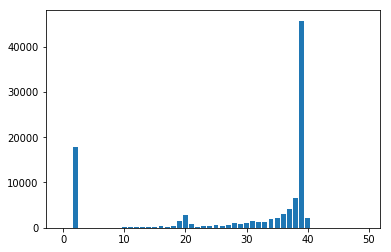

In [90]:
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [91]:
q_list = len(h)

In [92]:
print(q_list)

50


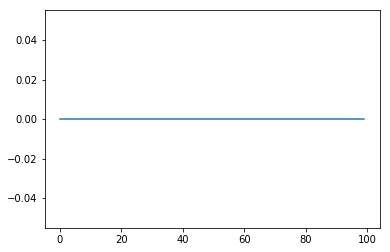

In [93]:
def findQualByPos(reads):
    ''' Find the call quality at each position in the read '''
    # Keep track of the number of lowest quality calls and the total number of bases at each position
    quals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 0:
                quals[i] += 1
    return quals

quals = findQualByPos(seqs)
plt.plot(range(len(quals)), quals)
plt.show()

In [94]:
# implement boyer-moore

In [95]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [96]:
# GCTAGCTCTACGAGTCTA
p = 'TCAA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.bad_character_rule(2, 'T')

2

In [98]:
# GCTAGCTCTACGAGTCTA
# ACTA
p = 'ACTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.good_suffix_rule(0)

3

In [99]:
# ACACGCTCTACGAGTCTA
# ACAC
p = 'ACAC'
p_bm = BoyerMoore(p, alphabet='ACGT')
p_bm.match_skip()

2

In [100]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

## 2.2 substring index

In [101]:
# implementing a k-mer index
# rewatch practical for implementing a k-mer index
# https://coursera.org/share/1c71b72e3bd42b6d6389d29645c25736

In [102]:
import bisect

In [103]:
class Index(object):
    def __init__(self, t, k):
        self.k = k
        self.index = []
        for i in range(len(t) - k + 1):
            self.index.append((t[i:i+k], i))
        self.index.sort()
    
    def query(self, p):
        kmer = p[:self.k]
        i = bisect.bisect_left(self.index, (kmer, -1))
        hits = []
        while i < len(self.index):
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [104]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k:i+len(p)]:
            offsets.append(i)# verification
        return offsets

In [105]:
t = 'GCTACGATCTAGAATCTA'
p = 'TCTA'

In [106]:
index = Index(t, 2)
print(queryIndex(p, t, index))

[7]


In [107]:
t[14:15]

'T'

In [108]:
def approximate_match(p, t, n):
    segment_length = int(round(len(p) / (n+1)))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        # Extend matching segments to see if whole p matches
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            if mismatches <= n:
                all_matches.add(m - start)
    return list(all_matches)

In [109]:
p = 'AACTTG'
t = 'CACTTAATTTG'
print(approximate_match(p, t, 2))

TypeError: 'list' object is not callable

## 2.3 approximate matching

In [110]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

--2020-12-08 13:49:55--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.232.192, 99.84.232.26, 99.84.232.33, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.232.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810105 (791K) [application/octet-stream]
Saving to: ‘chr1.GRCh38.excerpt.fasta.1’

chr1.GRCh38.excerpt 100%[===================>] 791.12K  1.23MB/s    in 0.6s    

2020-12-08 13:49:56 (1.23 MB/s) - ‘chr1.GRCh38.excerpt.fasta.1’ saved [810105/810105]



In [111]:
#function for parsing fasta file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('chr1.GRCh38.excerpt.fasta')
genome[:100]

'TTGAATGCTGAAATCAGCAGGTAATATATGATAATAGAGAAAGCTATCCCGAAGGTGCATAGGTCAACAATACTTGAGCCTAACTCAGTAGATCCTAAAA'

In [112]:
#function for naive pattern matching algorithm
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
          occurrences.append(i)
    return occurrences

In [113]:
#prepocessor for boyer-moore fast pattern matching algorithm
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [114]:
#function for boyer-moore fast pattern matching algorithm
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [115]:
#testing both functions
#boyer-moore
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
boyer_moore(p, p_bm, t)

[6, 14]

In [116]:
#naive
naive(p, t)

[6, 14]

In [117]:
def naive_with_counts(p, t):
    occurrences = []
    num_char_comp = 0
    num_aligments_tried = 0
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        num_aligments_tried += 1
        for j in range(len(p)):  # loop over characters
            num_char_comp += 1
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences, num_char_comp, num_aligments_tried
p = 'word'
t = 'there would have been a time for such a word'
print(naive_with_counts(p,t))

([40], 46, 41)


In [118]:
def boyer_moore_with_counts(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text, p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    num_char_comp = 0
    num_aligments_tried = 0
    
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        num_aligments_tried += 1

        for j in range(len(p)-1, -1, -1):
            num_char_comp += 1
            if p[j] != t[i+j]:    
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break

        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
        
    return occurrences, num_char_comp, num_aligments_tried

p = 'word'
t = 'there would have been a time for such a word'
lowercase_alphabet = 'abcdefghijklmnopqrstuvwxyz '
p_bm = BoyerMoore(p, lowercase_alphabet)
print(boyer_moore_with_counts(p,p_bm,t))

([40], 15, 12)


In [120]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = genome

total_char_comp = 0
total_align_comp = 0

for t in reads:
    occurrences, num_char_comp, num_aligments_tried = naive_with_counts(p, t)
    total_char_comp += num_char_comp
    total_align_comp += num_aligments_tried
print(total_align_comp)

5400
